In [ ]:
!pip install bert-extractive-summarizer

     |████████████████████████████████| 3.8 MB 7.7 MB/s 
     |████████████████████████████████| 895 kB 48.4 MB/s 
     |████████████████████████████████| 6.5 MB 35.4 MB/s 
     |████████████████████████████████| 596 kB 37.2 MB/s 
     |████████████████████████████████| 67 kB 3.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install spacy
!pip install transformers
!pip install neuralcoref

     |████████████████████████████████| 286 kB 5.2 MB/s 
     |████████████████████████████████| 132 kB 42.8 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 8.6 MB 44.6 MB/s 
     |████████████████████████████████| 127 kB 31.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.8 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=d8ca8f8a67bdfb6de8c12d348f8d3192f1cd647f3a08fa6dd01cb86ce90775a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-xhwo6i0b/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
from summarizer import Summarizer,TransformerSummarizer

model = Summarizer()


text = open('/content/drive/MyDrive/P101/data/Harry_Potter_Book.txt')
text = text.read()

print(text)


Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).




Harry Potter and the Sorcerer's Stone
CHAPTER ONE   

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.

Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.

The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters.

In [ ]:
bert_summary = ''.join(model(text, min_length=10))
print(bert_summary)

Harry Potter and the Sorcerer's Stone
CHAPTER ONE   

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. It stared back. People in cloaks. He supposed this was some stupid new fashion. The nerve of him! He made several important telephone calls and shouted a bit more. He'd never even seen the boy. He didn't blame her -- if he'd had a sister like that... but all
the same, those people in cloaks...

He found it a lot harder to concentrate on drills that afternoon and when he left the building at five o'clock, he was still so worried that he walked straight into someone just outside the door. "Sorry," he grunted, as the tiny old man stumbled and almost fell. Even Muggles like yourself should be celebrating, this happy,
happy day!" said Mr. Dursley loudly. The cat didn't move. Was this normal cat behavior? "Most mysterious. And now, over to Jim McGuffin with the weather. Going to be any more showers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
!curl -s -o setup.sh https://raw.githubusercontent.com/tproffen/ORCSGirlsPython/master/TextMining/Helpers/setup_activity5.sh
!bash setup.sh

     |████████████████████████████████| 125 kB 5.5 MB/s 
Fetching needed files ..
Done


In [16]:
import Helpers
from Helpers.load_data import *
from Helpers.plot_data import *
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
sentences = [
    "Our Saturday classes and fun and super interesting!",
    "Make sure you :) or :D today!",
    "The book was great, I enjoyed it very much.",
    "At least it isn't a horrible book.",
    "I got a very bad grade on my homework.",
    "Today is a really terrible day :("
]
print(sentences)

['Our Saturday classes and fun and super interesting!', 'Make sure you :) or :D today!', 'The book was great, I enjoyed it very much.', "At least it isn't a horrible book.", 'I got a very bad grade on my homework.', 'Today is a really terrible day :(']


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# this line just creates a sentiment model
sentiment_model = SentimentIntensityAnalyzer()

# now we will iterate over all sentences and get their sentiment
for sentence in sentences:
    
    # get sentiment
    scores = sentiment_model.polarity_scores(sentence)
    
    # print the sentence and sentiment
    print(sentence)
    
    # the {: <15} characters just tell python to add spaces between columns
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

Our Saturday classes and fun and super interesting!
negative: 0.0             neutral: 0.329           positive: 0.671           compound: 0.8805

Make sure you :) or :D today!
negative: 0.0             neutral: 0.294           positive: 0.706           compound: 0.8633

The book was great, I enjoyed it very much.
negative: 0.0             neutral: 0.486           positive: 0.514           compound: 0.8126

At least it isn't a horrible book.
negative: 0.0             neutral: 0.678           positive: 0.322           compound: 0.431

I got a very bad grade on my homework.
negative: 0.322           neutral: 0.678           positive: 0.0             compound: -0.5849

Today is a really terrible day :(
negative: 0.567           neutral: 0.433           positive: 0.0             compound: -0.762



In [19]:
!curl -o Data/chapters.json https://raw.githubusercontent.com/tproffen/ORCSGirlsPython/master/TextMining/Data/chapters.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6175  100  6175    0     0   123k      0 --:--:-- --:--:-- --:--:--  125k


In [20]:
book_1 = load_book_1()

# print the first 500 characters of book 1
print(book_1[0:500])

 THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly tw


In [21]:
book_1_chapters, book_1_chapter_names = load_book_1_chapters()

In [22]:
print(book_1_chapter_names)

['THE BOY WHO LIVED', 'THE VANISHING GLASS', 'THE LETTERS FROM NO ONE', 'THE KEEPER OF THE KEYS', 'DIAGON ALLEY', 'THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS', 'THE SORTING HAT', 'THE POTIONS MASTER', 'THE MIDNIGHT DUEL', 'HALLOWEEN', 'QUIDDITCH', 'THE MIRROR OF ERISED', 'NICOLAS FLAMEL', 'NORBERT THE NORWEGIAN RIDGEBACK', 'THE FORBIDDEN FOREST', 'THROUGH THE TRAPDOOR', 'THE MAN WITH TWO FACES']


In [23]:
print(book_1_chapters[13][0:500])

　　Quirrell, however, must have been braver than they'd thought. In the weeks that followed he did seem to be getting paler and thinner, but it didn't look as though he'd cracked yet.　　Every time they passed the third-floor corridor, Harry, Ron, and Hermione would press their ears to the door to check that Fluffy was still growling inside. Snape was sweeping about in his usual bad temper, which surely meant that the Stone was still safe. Whenever Harry passed Quirrell these days he gave him an en


In [24]:
# import NLTK, a library for text mining in Python
from nltk import sent_tokenize

# let's get sentences from the first chapter
# remember that Python indexes lists from 0, so the first chapter has index 0
sentences = sent_tokenize(book_1_chapters[0])

In [25]:
for sentence in sentences[0:5]:
    
    scores = sentiment_model.polarity_scores(sentence)
    
    print(sentence)
    
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.
negative: 0.0             neutral: 0.619           positive: 0.381           compound: 0.8779

They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.
negative: 0.176           neutral: 0.824           positive: 0.0             compound: -0.5423

Mr. Dursley was the director of a firm called Grunnings, which made drills.
negative: 0.0             neutral: 1.0             positive: 0.0             compound: 0.0

He was a big, beefy man with hardly any neck, although he did have a very large mustache.
negative: 0.0             neutral: 1.0             positive: 0.0             compound: 0.0

Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.
ne

In [26]:
all_scores = []

for sentence in sentences:
    
    scores = sentiment_model.polarity_scores(sentence)
    
    all_scores.append([sentence, scores])

Let's print the top 10 most positive sentences from chapter 1.

In [27]:
sorted_sentences = sorted(all_scores, key=lambda x: x[1]['pos'], reverse=True)[:10]

for sentence, scores in sorted_sentences:

    print(sentence)
    
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

"Yes, I quite agree."
negative: 0.0             neutral: 0.267           positive: 0.733           compound: 0.6697

Even Muggles like yourself should be celebrating, this happy, happy day!"
negative: 0.0             neutral: 0.325           positive: 0.675           compound: 0.9389

"Good luck, Harry," he murmured.
negative: 0.0             neutral: 0.337           positive: 0.663           compound: 0.7096

"Yes," said Dumbledore.
negative: 0.0             neutral: 0.426           positive: 0.574           compound: 0.4019

"We've had precious little to celebrate for eleven years."
negative: 0.0             neutral: 0.496           positive: 0.504           compound: 0.7976

"You can't blame them," said Dumbledore gently.
negative: 0.0             neutral: 0.498           positive: 0.502           compound: 0.6169

"It's lucky it's dark.
negative: 0.0             neutral: 0.517           positive: 0.483           compound: 0.4215

"It's -- it's true?"
negative: 0.0             neutr

Now let's print the top 10 negative sentences from chapter 1.

In [28]:
sorted_sentences = sorted(all_scores, key=lambda x: x[1]['neg'], reverse=True)[:10]

for sentence, scores in sorted_sentences:

    print(sentence)
    
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

Fear flooded him.
negative: 0.615           neutral: 0.385           positive: 0.0             compound: -0.4939

"But that's no reason to lose our heads.
negative: 0.514           neutral: 0.486           positive: 0.0             compound: -0.7469

"A lemon drop.
negative: 0.512           neutral: 0.488           positive: 0.0             compound: -0.2732

Professor McGonagall sniffed angrily.
negative: 0.483           neutral: 0.517           positive: 0.0             compound: -0.4215

"No problems, were there?"
negative: 0.474           neutral: 0.526           positive: 0.0             compound: -0.4019

It was no good.
negative: 0.445           neutral: 0.555           positive: 0.0             compound: -0.3412

As he had expected, Mrs. Dursley looked shocked and angry.
negative: 0.412           neutral: 0.588           positive: 0.0             compound: -0.6808

A low rumbling sound had broken the silence around them.
negative: 0.394           neutral: 0.606           positi

Now that we know how to get sentiment of sentences, let's find sentiment of each chapter in the book and create a plot!
We will do the following:
Split each chapter in book 1 into sentences
Get compound sentiment score of each sentence
Calculate the sentiment score of a chapter as the average value of sentiment of all sentences 

In [29]:
book_chapters, chapter_names = load_book_1_chapters()

# let's store sentiment scores for each chapter in a list
chapter_scores = []

for chapter in book_chapters:
    
    sentences = sent_tokenize(chapter)
    
    # to calculate average score, we will first store scores for all sentences
    all_scores = []    
    for sentence in sentences:
        scores = sentiment_model.polarity_scores(sentence)
        compound_score = scores['compound']
        all_scores.append(compound_score)

    # average is calculated as sum of all scores divided by number of scores
    chapter_score = sum(all_scores) / len(all_scores)
    chapter_scores.append(chapter_score)

In [30]:
list(zip(chapter_names, chapter_scores))

[('THE BOY WHO LIVED', 0.04949183673469388),
 ('THE VANISHING GLASS', -0.02255344827586207),
 ('THE LETTERS FROM NO ONE', 0.0014747440273037528),
 ('THE KEEPER OF THE KEYS', -0.02389240506329113),
 ('DIAGON ALLEY', 0.06140107526881722),
 ('THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS', 0.0474448581560284),
 ('THE SORTING HAT', 0.04662727272727273),
 ('THE POTIONS MASTER', 0.028502020202020188),
 ('THE MIDNIGHT DUEL', 0.005425000000000004),
 ('HALLOWEEN', 0.050271556886227524),
 ('QUIDDITCH', 0.012716666666666678),
 ('THE MIRROR OF ERISED', 0.04338873873873873),
 ('NICOLAS FLAMEL', 0.025598437500000005),
 ('NORBERT THE NORWEGIAN RIDGEBACK', 0.0248185064935065),
 ('THE FORBIDDEN FOREST', -0.044678761061946876),
 ('THROUGH THE TRAPDOOR', 0.03829948364888125),
 ('THE MAN WITH TWO FACES', 0.02770584551148225)]

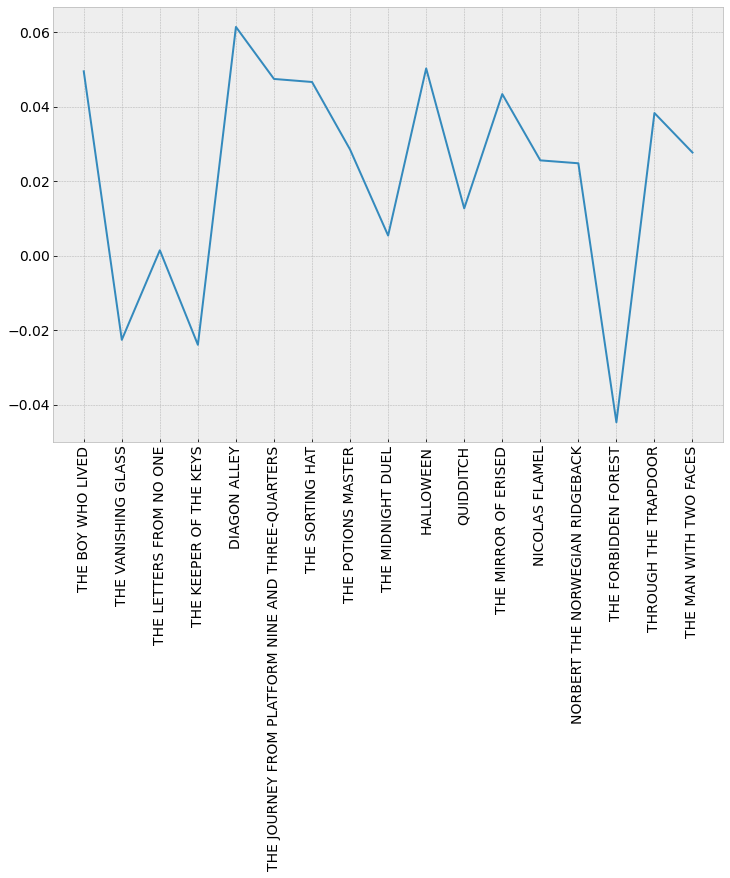

In [31]:
plot_book_scores(chapter_names, chapter_scores)

Sentiment of all books
Let's try to do the same for all books.
We prepared a helper function for loading all chapters.

In [32]:
all_chapters, all_names = load_all_chapters()

In [33]:
all_chapter_scores = []

for book_chapters in all_chapters:
    
    chapter_scores = []
    
    for chapter in book_chapters:
    
        sentences = sent_tokenize(chapter)

        all_scores = []    
        for sentence in sentences:
            scores = sentiment_model.polarity_scores(sentence)
            compound_score = scores['compound']
            all_scores.append(compound_score)

        # average is calculated as sum of all scores divided by number of scores
        chapter_score = sum(all_scores) / len(all_scores)
        chapter_scores.append(chapter_score)
        
    all_chapter_scores.append(chapter_scores)

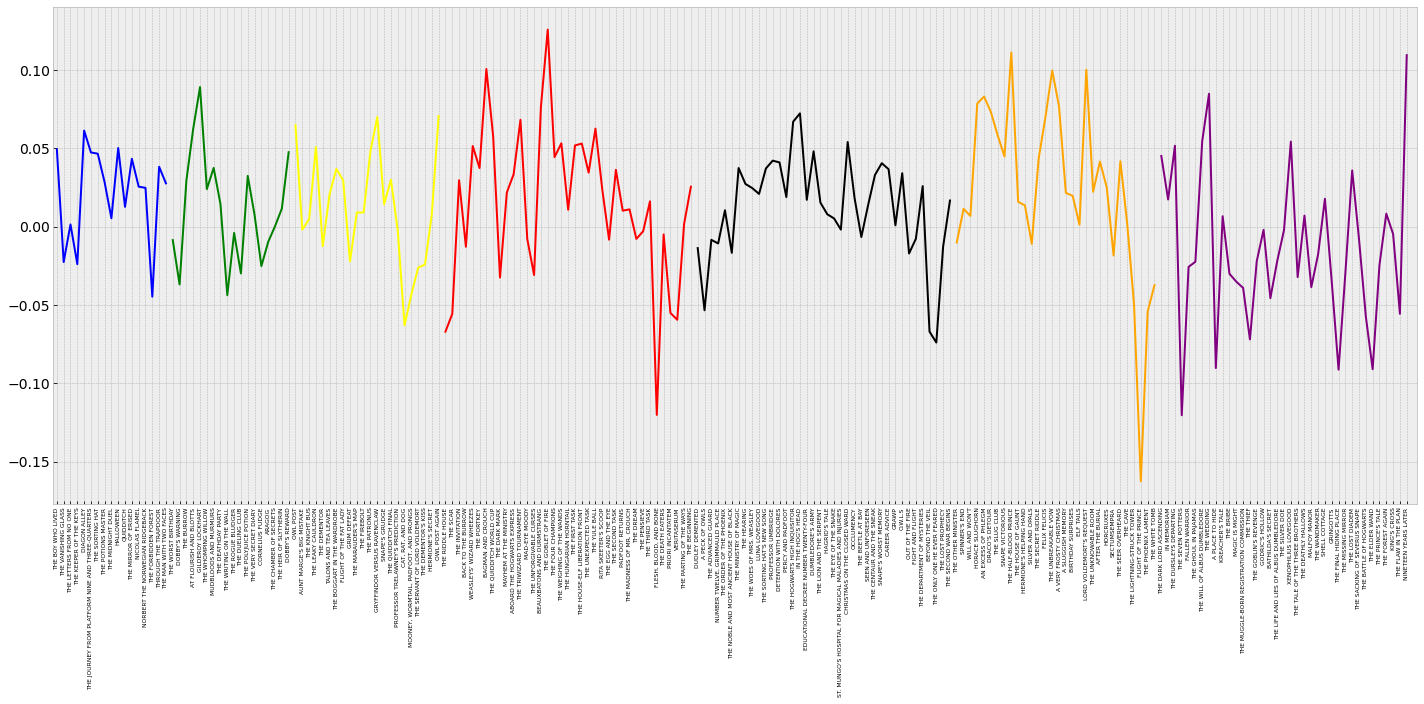

In [34]:
plot_all_book_scores(all_names, all_chapter_scores)